In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize


In [4]:
# Load data
train_data = pd.read_csv("files/imdb_reviews.csv")
test_data = pd.read_csv("files/test_reviews.csv")


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Reviews    25000 non-null  object
 1   Sentiment  25000 non-null  object
dtypes: object(2)
memory usage: 390.8+ KB


In [6]:
train_data['value'] = np.where(train_data['Sentiment']== 'positive', 1, 0)
test_data['value'] = np.where(test_data['Sentiment']== 'positive', 1, 0)
train_data

,Reviews,Sentiment,value
0,<START this film was just brilliant casting lo...,positive,1
1,<START big hair big boobs bad music and a gian...,negative,0
2,<START this has to be one of the worst films o...,negative,0
3,<START the <UNK> <UNK> at storytelling the tra...,positive,1
4,<START worst mistake of my life br br i picked...,negative,0
...,...,...,...
24995,<START this is a racist movie but worthy of st...,positive,1
24996,<START bela lugosi plays a doctor who will do ...,negative,0
24997,<START in a far away galaxy is a planet called...,negative,0
24998,<START six degrees had me hooked i looked forw...,positive,1


In [7]:
x_train = train_data['Reviews']
y_train = train_data['value']
x_test = test_data['Reviews']
y_test = test_data['value']

In [8]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
import re
import re
exclude_word = ['not']
stop = set(stopwords.words("english"))
filter_words = [word for word in stop if word not in exclude_word]


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\priya\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\priya\AppData\Roaming\nltk_data...


In [9]:
import re
def striphtml(data):
    p = re.compile(r'<.*?>')
    return p.sub('', data)

def remove_stopwords(text):
    filtered_words = " ".join([word.lower() for word in text.split() if word.lower() not in filter_words])
    filtered_words = striphtml(filtered_words)
    return filtered_words

In [10]:
# Apply the function to your text data
x_train = x_train.apply(remove_stopwords)
x_test =  x_test.apply(remove_stopwords)
x_train.head()

0     amazing actor director  father came scottish ...
1     hair big lots boobs  men wear cut  shirts sho...
2     working watch feeble excuse film must looked ...
3      storytelling traditional sort many years eve...
4     watched burn felt better anything else ever d...
Name: Reviews, dtype: object

In [11]:
# # Apply TF-IDF vectorizer.
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(x_train)
X_test = vectorizer.transform(x_test)


In [12]:
import joblib
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")


['tfidf_vectorizer.pkl']

In [13]:

# Build Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [14]:
# Evaluate the model
from sklearn.metrics import f1_score
y_pred_lr = lr_model.predict(X_test)
f1_score(y_pred_lr, y_test)



0.8655549349716748

In [15]:
accuracy_lr = (y_test == y_pred_lr).mean()
accuracy_lr

np.float64(0.8652)

In [16]:
import joblib
joblib.dump(lr_model, "sentiment_analysis_model.pkl")


['sentiment_analysis_model.pkl']

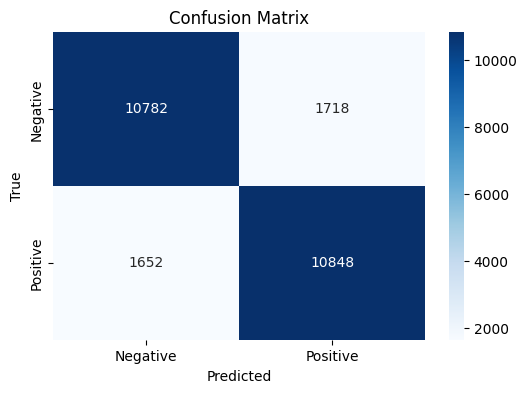

In [17]:
from matplotlib import pyplot as plt
import seaborn as sn
cm = confusion_matrix(y_test, y_pred_lr)
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sn.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.savefig('lr_cm.png')
plt.show()

In [18]:
class_labels = ['negative', 'positive']

classification_report_lr = classification_report(y_test, y_pred_lr, target_names=class_labels)
print("Classification Report:")
print(classification_report_lr)

Classification Report:
              precision    recall  f1-score   support

    negative       0.87      0.86      0.86     12500
    positive       0.86      0.87      0.87     12500

    accuracy                           0.87     25000
   macro avg       0.87      0.87      0.87     25000
weighted avg       0.87      0.87      0.87     25000



In [19]:
# Predict sentiments using the trained model
input_text = [ "This movie is worst!",
              "Wow Amazing Eposide",
              "This movie was amazing! I loved every moment of it.",
              "The title doesn't appear on screen until 40 minutes into the movie."]
input_text_vectorized = vectorizer.transform(input_text)
predicted_sentiments = lr_model.predict(input_text_vectorized)

In [20]:
# Print the predictions
for text, sentiment in zip(input_text, predicted_sentiments):
    sentiment = 'positive' if sentiment == 1 else 'negative'

    print(f"Text: {text}\nPredicted Sentiment: {sentiment}\n")

Text: This movie is worst!
Predicted Sentiment: negative

Text: Wow Amazing Eposide
Predicted Sentiment: positive

Text: This movie was amazing! I loved every moment of it.
Predicted Sentiment: positive

Text: The title doesn't appear on screen until 40 minutes into the movie.
Predicted Sentiment: negative

